In [ ]:
#install.packages(c("tidyverse", "fixest", "ggplot2", "broom"))
#install.packages("dplyr")
#install.packages("tidyr")
#install.packages("ggplot2")
#install.packages("sandwich")
#install.packages("lmtest")

Installing package into 'C:/Users/johnb/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\johnb\AppData\Local\Temp\RtmpGc22r5\downloaded_packages


Installing package into 'C:/Users/johnb/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\johnb\AppData\Local\Temp\RtmpGc22r5\downloaded_packages


Installing package into 'C:/Users/johnb/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\johnb\AppData\Local\Temp\RtmpGc22r5\downloaded_packages


Installing package into 'C:/Users/johnb/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'sandwich' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\johnb\AppData\Local\Temp\RtmpGc22r5\downloaded_packages


Installing package into 'C:/Users/johnb/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\johnb\AppData\Local\Temp\RtmpGc22r5\downloaded_packages


In [3]:
library(tidyverse)
library(fixest) 
library(ggplot2)
library(dplyr)

In [4]:
file_path <- "../../input/bacon_example.csv"
output_path <- "../output"

if (!dir.exists(output_path)) {
  dir.create(output_path)
  print(paste("Carpeta creada:", output_path))
} else {
  print(paste("Ruta de salida configurada:", output_path))
}

df <- read.csv(file_path)

# Preview
head(df)

[1] "Ruta de salida configurada: ../output"


,stfips,year,X_nfd,post,asmrs,pcinc,asmrh,cases,weight,copop
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1964,1971,0,35.63988,12406.18,5.007341,0.012312243,1715156,1715156
2,1,1965,1971,0,41.54375,13070.21,4.425367,0.010419407,1715156,1725186
3,1,1966,1971,0,34.25233,13526.66,4.874819,0.009900097,1715156,1735219
4,1,1967,1971,0,34.46502,13918.19,5.362014,0.009974692,1715156,1745250
5,1,1968,1971,0,40.44011,14684.81,4.643759,0.012400659,1715156,1755283
6,1,1969,1971,0,42.49012,15638.88,5.296976,0.015006756,1715156,1765316


## PART A

In [5]:
twfe_model <- feols(asmrs ~ post + pcinc + asmrh + cases | stfips + year, 
                    data = df, 
                    cluster = ~stfips)

etable(twfe_model)

,,twfe_model
,<chr>,<chr>
1,Dependent Var.:,asmrs
2,,
3,post,-2.516 (2.283)
4,pcinc,-0.0011** (0.0004)
5,asmrh,1.185* (0.5765)
6,cases,-178.5 (138.0)
7,Fixed-Effects:,------------------
8,stfips,Yes
9,year,Yes


## PART B

--- Tabla de Frecuencias (Muestra parcial) ---



-19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0 
  2   2   2   3   3   3   6   7   9  12  22  25  32  34  36  36  36  36  36  36 
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
 36  36  36  36  36  36  36  36  36  36  36  35  34  34  34  34  33  33  33 


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Removed 6 rows containing non-finite outside the scale range (`stat_count()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`)."
Warning message:
"Removed 6 rows containing non-finite outside the scale range (`stat_count()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`)."


Gráfico guardado en: ../output/histograma_frecuencias.png 

--- Justificación de Límites ---
Se eligieron los límites -8 y 10 observando el histograma. Los periodos fuera de este rango tienen pocas observaciones, lo que causaría alta varianza. Se realiza 'binning' en los extremos.

--- Dummies creadas exitosamente ---
  rel_neg_8 rel_neg_7 rel_neg_6 rel_neg_5 rel_neg_4 rel_neg_3 rel_neg_2
1         0         1         0         0         0         0         0
2         0         0         1         0         0         0         0
3         0         0         0         1         0         0         0
  rel_pos_0 rel_pos_1 rel_pos_2 rel_pos_3 rel_pos_4 rel_pos_5 rel_pos_6
1         0         0         0         0         0         0         0
2         0         0         0         0         0         0         0
3         0         0         0         0         0         0         0
  rel_pos_7 rel_pos_8 rel_pos_9 rel_pos_10
1         0         0         0          0
2         0       

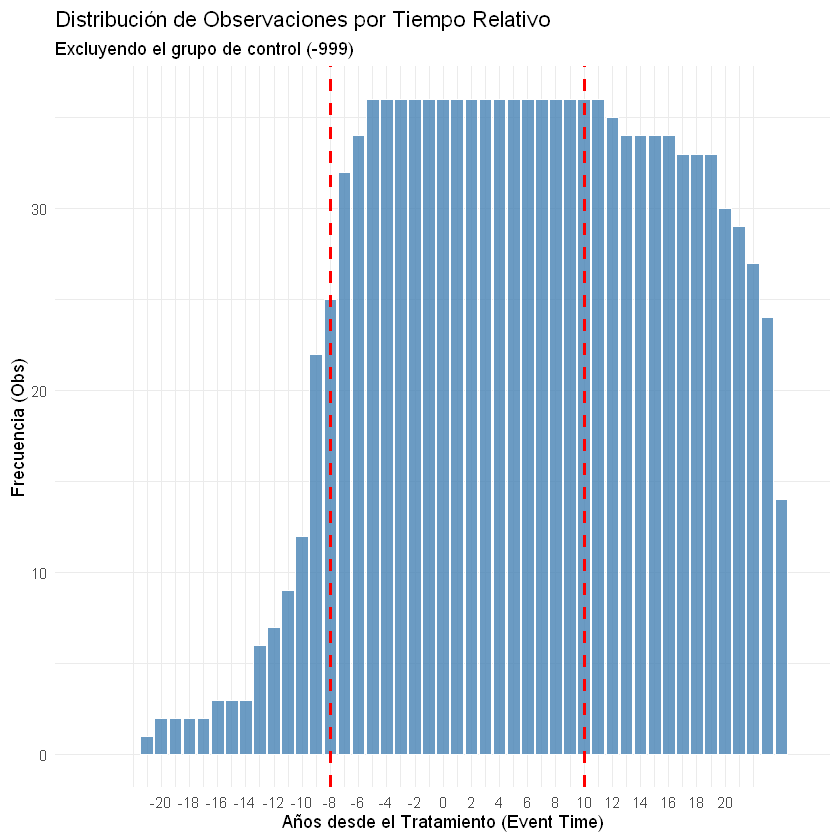

In [6]:
# 1. Verificar y corregir nombre
if ("X_nfd" %in% names(df)) {
  df <- df %>% rename(nfd = X_nfd)
} else if ("_nfd" %in% names(df)) {
  df <- df %>% rename(nfd = `_nfd`) 
}

# 2. Crear variable de tiempo relativo
df <- df %>%
  mutate(event_time = year - nfd) %>%
  mutate(event_time = replace_na(event_time, -999)) # Control groups con valor lejano

# 3. Frequency Table y GRÁFICO (Corregido)
cat("--- Tabla de Frecuencias (Muestra parcial) ---\n")
# Solo mostramos la tabla para el rango relevante para no llenar la consola con -999
print(table(df$event_time[df$event_time > -20 & df$event_time < 20]))

# --- CORRECCIÓN DEL GRÁFICO ---
# Filtramos los -999 (nunca tratados) SOLO para el gráfico, para que no rompan la escala
p_hist <- df %>%
  filter(event_time != -999) %>% 
  ggplot(aes(x = event_time)) +
  geom_bar(fill = "steelblue", color = "white", alpha = 0.8) +
  # Líneas verticales donde haremos los cortes
  geom_vline(xintercept = c(-8, 10), color = "red", linetype = "dashed", size = 1) +
  # Escala del eje X para que se vea claro cada año
  scale_x_continuous(breaks = seq(-20, 20, 2), limits = c(-25, 25)) +
  labs(title = "Distribución de Observaciones por Tiempo Relativo",
       subtitle = "Excluyendo el grupo de control (-999)",
       x = "Años desde el Tratamiento (Event Time)",
       y = "Frecuencia (Obs)") +
  theme_minimal()

# Mostramos el gráfico en pantalla
print(p_hist)

# GUARDAMOS EL GRÁFICO (Esto faltaba)
ggsave(file.path(output_path, "histograma_frecuencias.png"), plot = p_hist, width = 8, height = 5)
cat(paste("Gráfico guardado en:", file.path(output_path, "histograma_frecuencias.png"), "\n"))


# 4. Choosing Bounds & Binning (0.5 pts)
lower_bound <- -8
upper_bound <- 10

# Justificación
cat("\n--- Justificación de Límites ---\n")
cat("Se eligieron los límites", lower_bound, "y", upper_bound, 
    "observando el histograma. Los periodos fuera de este rango tienen pocas observaciones,",
    "lo que causaría alta varianza. Se realiza 'binning' en los extremos.\n")

# Aplicamos el binning (Acumular colas)
df <- df %>%
  mutate(
    rel_time_binned = case_when(
      event_time < lower_bound ~ lower_bound, # Todo lo menor a -8 se vuelve -8
      event_time > upper_bound ~ upper_bound, # Todo lo mayor a 10 se vuelve 10
      TRUE ~ event_time
    )
  )

# 5. Dummy creation (1 pt)
rel_times <- sort(unique(df$rel_time_binned))

# Excluimos referencia (t = -1) y nunca tratados (-999)
rel_times <- rel_times[rel_times != -1 & rel_times != -999]

dummy_names <- c()

for (k in rel_times) {
  # Nombres claros: rel_neg_2, rel_pos_0
  prefix <- ifelse(k < 0, "neg", "pos") 
  col_name <- paste0("rel_", prefix, "_", abs(k)) 
  
  # Crear dummy
  df[[col_name]] <- as.integer(df$rel_time_binned == k)
  
  dummy_names <- c(dummy_names, col_name)
}

cat("\n--- Dummies creadas exitosamente ---\n")
print(head(df[, dummy_names], 3))

In [7]:
freq_table_df <- as.data.frame(table(df$event_time))
colnames(freq_table_df) <- c("Event_Time", "Frecuencia")
full_file_name <- file.path(output_path, "tabla_frecuencias.csv")
write.csv(freq_table_df, full_file_name, row.names = FALSE)

 #### Question: Why do we usually group very distant event times together? 
 Its because we have thin support (less data) in the tails due to the finite sample window. Estimating separate coefficients for these sparse periods without binning would result in high standard errors and greater variance (low precision)


## part c

[1] "Nombres de coeficientes detectados:"
[1] "rel_neg_8" "rel_neg_7" "rel_neg_6" "rel_neg_5" "rel_neg_4" "rel_neg_3"
[1] "Gráfico guardado en: ../output/event_study_plot.png"
[1] "CSV guardado en: ../output/event_study_coefs.csv"


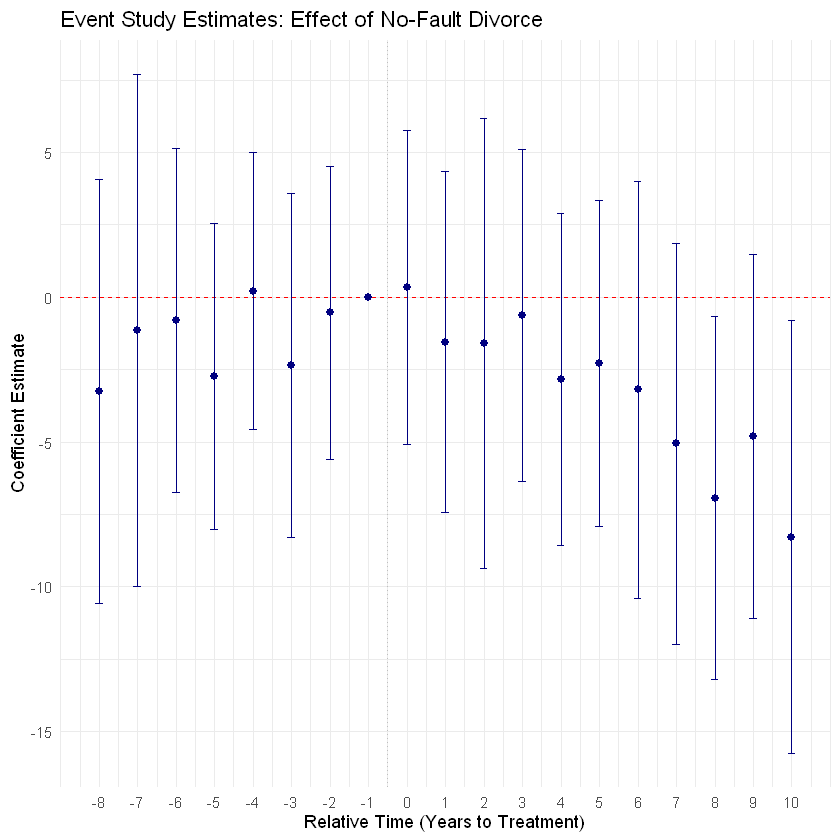

In [8]:

# 1. Estimate the model
# ---------------------
dummy_formula <- paste(dummy_names, collapse = " + ")
formula_es <- as.formula(paste("asmrs ~", dummy_formula, "+ pcinc + asmrh + cases | stfips + year"))
model_es <- feols(formula_es, data = df, cluster = ~stfips)

# 2. Store coefficients (CORREGIDO)
# ---------------------------------
res_es <- broom::tidy(model_es, conf.int = TRUE) %>%
  filter(grepl("rel_", term)) 

# Verificamos qué nombres tenemos realmente antes de procesar (para debugging visual)
print("Nombres de coeficientes detectados:")
print(head(res_es$term))

plot_data <- res_es %>%
  mutate(
    period = term %>% 
      # Paso 1: Quitar el prefijo base "rel_"
      str_remove("rel_") %>% 
      # Paso 2: Si existe "neg_" o "neg", cambiarlo por "-"
      str_replace("neg_?", "-") %>% 
      # Paso 3: Si existe "pos_" o "pos", quitarlo (dejar vacío)
      str_remove("pos_?") %>% 
      # Paso 4: Limpiar cualquier guion bajo remanente (ej. si quedo "_2")
      str_remove("_") %>%
      # Paso 5: Convertir a número
      as.numeric()
  ) %>%
  select(period, estimate, conf.low, conf.high)

# Verificar si quedaron NAs (Esto te salvará del error en el gráfico)
if(any(is.na(plot_data$period))) {
  stop("¡Error! La conversión de nombres a periodos generó NAs. Revisa 'res_es$term'.")
}

# Add reference period (t = -1)
ref_point <- data.frame(period = -1, estimate = 0, conf.low = 0, conf.high = 0)
plot_data <- bind_rows(plot_data, ref_point) %>% arrange(period)

# 3. Plotting & Saving
# --------------------
p_es <- ggplot(plot_data, aes(x = period, y = estimate)) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  geom_vline(xintercept = -0.5, color = "grey", linetype = "dotted") +
  geom_point(color = "navy", size = 2) +
  geom_errorbar(aes(ymin = conf.low, ymax = conf.high), width = 0.2, color = "navy") +
  labs(
    title = "Event Study Estimates: Effect of No-Fault Divorce",
    x = "Relative Time (Years to Treatment)",
    y = "Coefficient Estimate"
  ) +
  scale_x_continuous(breaks = seq(min(plot_data$period), max(plot_data$period), 1)) +
  theme_minimal()

print(p_es)

# --- GUARDAR PLOT ---
file_name_plot <- file.path(output_path, "event_study_plot.png")
ggsave(filename = file_name_plot, plot = p_es, width = 8, height = 6, dpi = 300)
print(paste("Gráfico guardado en:", file_name_plot))

# --- GUARDAR CSV ---
file_name_csv <- file.path(output_path, "event_study_coefs.csv")
write.csv(plot_data, file_name_csv, row.names = FALSE)
print(paste("CSV guardado en:", file_name_csv))